# **CÂU HỎI 4:**
**Thống kê title các ngành, đồng thời so sánh mức lương của các title theo năm? Việt Nam đang cần nhân lực ngành nào, thử giải thích?**

In [155]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import warnings
import re 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Đọc dữ liệu từ file `./data.csv` và lưu vào dataframe `df`

In [156]:
df = pd.read_csv('./data.csv')
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData
0,Business Analyst,Asilla Việt Nam,2023-01-31,"(1200, 1400)",5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Cầu Giấy,Hà Nội",NaN,- Collaborate with Product Manager to understa...
1,Android Developer,FPT Software,2023-04-30,NaN,5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Hà Nội,Cầu Giấy,Thạch Thất",NaN,"• Working in Global delivery team (US, China, ..."
2,Nhân Viên IT,Công ty CPXD&PTHT Tây Hồ,2023-01-30,NaN,1,Toàn thời gian,Nhân viên,Nam,0.0,"Vĩnh Phúc,TP Vĩnh Yên",NaN,Chịu trách nhiệm giám sát hoạt động pho...
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,Ngân Hàng Thương Mại Cổ Phần Kiên Long,2023-01-31,"(600.0, 1200.0)",1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ..."
4,Java Developer,CÔNG TY TNHH YOUMED VIỆT NAM,2023-01-31,NaN,3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Hồ Chí Minh,Quận 10","Java,Message Queue,Back-End Web Development","Phát triển tính năng đặt khám, telemedicine, s..."


## 1. Tiền xử lý dữ liệu cho câu hỏi

Ta sẽ bỏ các dòng dữ liệu mang giá trị **`NaN`** của các cột '`Title`', '`Salary`', '`KinhNghiem`'. 

In [157]:
new_df = df[["Title","Salary","KinhNghiem"]].dropna()
new_df.head()

,Title,Salary,KinhNghiem
0,Business Analyst,"(1200, 1400)",3.0
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,"(600.0, 1200.0)",3.0
5,Nhân Sự,"(600, 700)",3.0
6,Tester,"(600, 800)",0.5
8,System Engineer,"(1600, 1800)",1.0


Các hàm tiền xử lý, áp dụng trực tiếp vào phần trả lời câu hỏi.

In [ ]:
def tuple_min(x):
    x = x.split(", ")
    for i in x:
        i = i.split('(')
        return float(i[1])

def tuple_max(x):
    x = x.split(", ")
    for i in range(len(x)):
        if (i % 2 == 1):
            x[i] = x[i].split(')')
            return float(x[i][0])
            
def mean(x):
    max = tuple_max(x)
    min = tuple_min(x)
    return (max + min)/2

## 2. Trả lời câu hỏi
- Chia ra cùng 1 năm các title có mức lương khác nhau như thế nào
- Kinh nghiệm sẽ gồm các mức là không có kinh nghiệm, dưới một năm, một năm, hai năm, 3 năm, 4 năm và từ 5 năm trở lên.

In [158]:
new_df['KinhNghiem'].unique()

array([3. , 0.5, 1. , 0. , 2. , 5.5, 4. , 5. ])

In [159]:
def draw_plot(year):
    Experience_year_df = new_df[new_df['KinhNghiem'] == year]
    Experience_year_df['Salary'] = Experience_year_df['Salary'].apply(mean)
    Experience_year_df = Experience_year_df.groupby(by='Title').mean().sort_values(by = 'Salary', ascending=False)
    Experience_year_df = Experience_year_df[:20]
    Experience_year_df.plot.barh()
    plt.xlabel('Mức lương')
    if (year == 0):
        plt.title("Trực quan hóa lương các vị trí không yêu cầu kinh nghiệm")
    elif (year == 0.5):
         plt.title("Trực quan hóa lương các vị trí dưới 1 năm kinh nghiệm")
    elif (year <= 5):
        plt.title("Trực quan hóa lương các vị trí với kinh nghiệm "+ str(year) +" năm")
    else:
        plt.title("Trực quan hóa lương các vị trí với kinh nghiệm >5 năm")

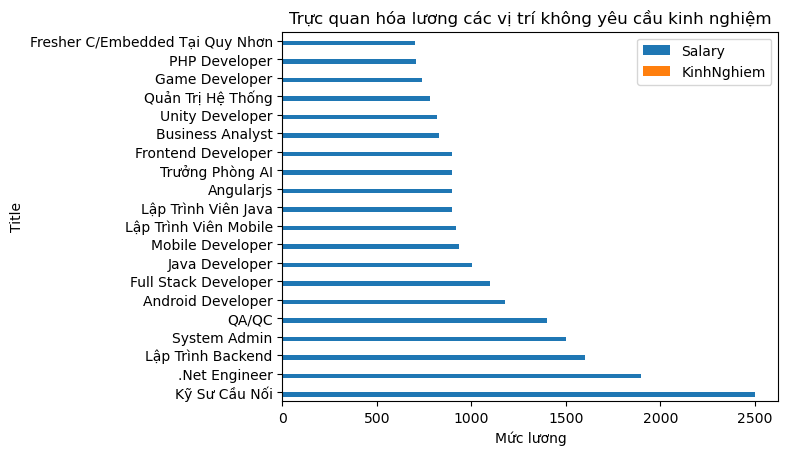

In [160]:
draw_plot(0)

**NHẬN XÉT:** 3 vị trí có mức lương cao nhất không yêu cầu kinh nghiệm là Kỹ sư cầu nối, .Net Engineer, Lập trình Backend

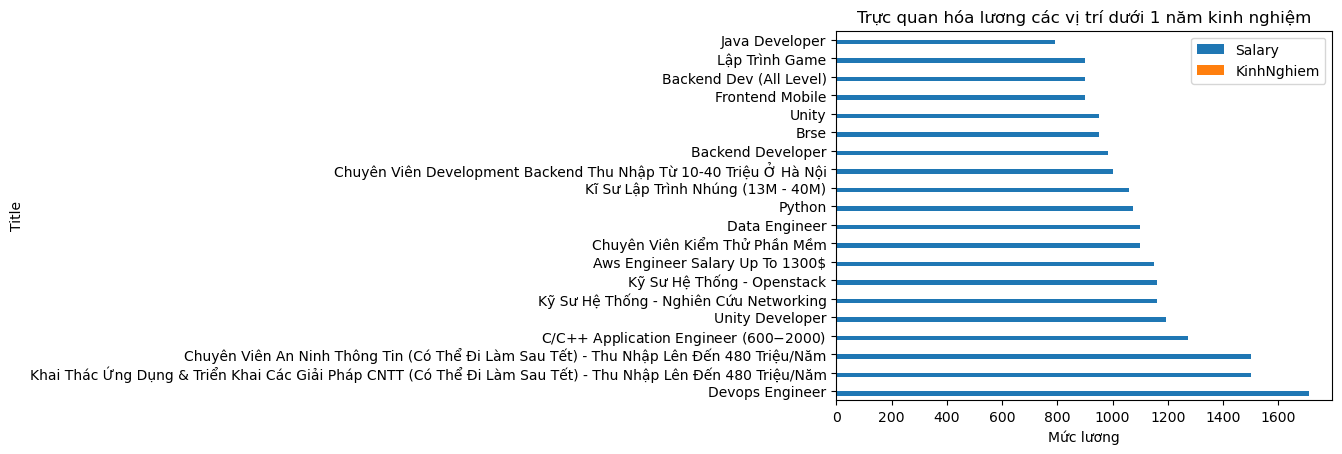

In [161]:
draw_plot(0.5)

**NHẬN XÉT:** 3 vị trí có mức lương cao nhất yêu cầu kinh nghiệm <1 năm là Devops Engineer, ANTT, Khai thác ứng dụng và triển khai giải pháp.

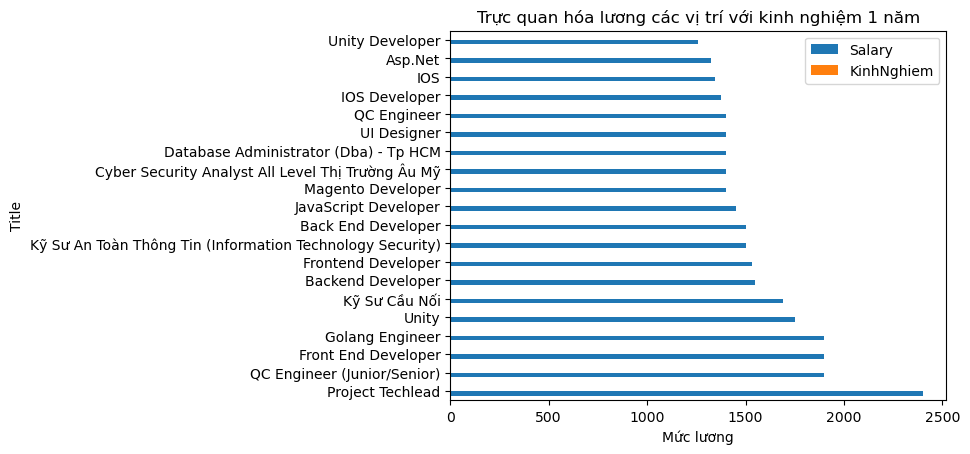

In [162]:
draw_plot(1)

**NHẬN XÉT:** 3 vị trí có mức lương cao nhất yêu cầu kinh nghiệm 1 năm là Project Techlead, QC, Frontend.

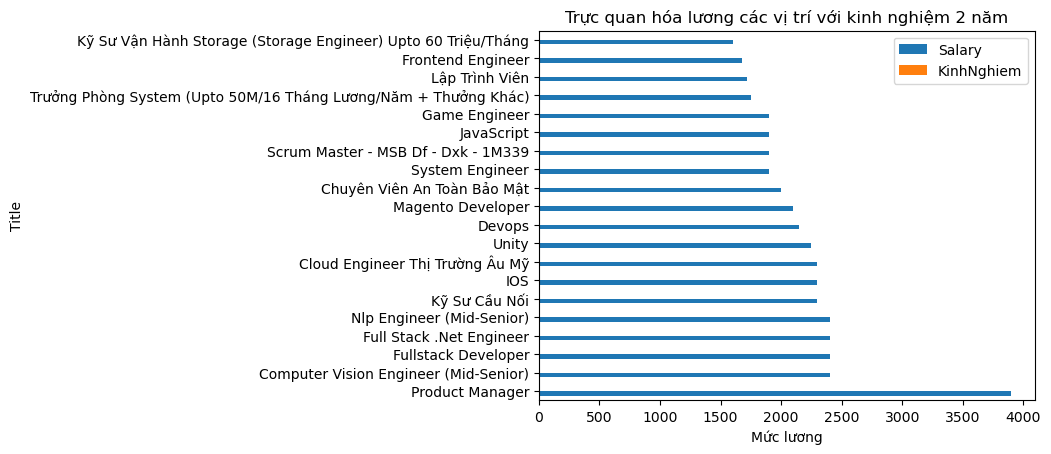

In [163]:
draw_plot(2)

**NHẬN XÉT:** 3 vị trí có mức lương cao nhất yêu cầu kinh nghiệm 2 năm là Product Manager, Computer Vision (mid-senior), FullStack.

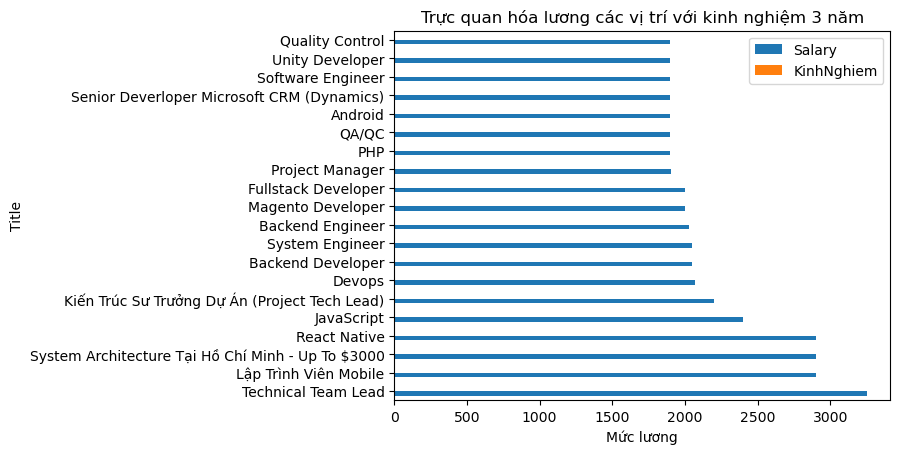

In [164]:
draw_plot(3)

**NHẬN XÉT:** 3 vị trí có mức lương cao nhất yêu cầu kinh nghiệm 3 năm là Technical Team Lead, Mobile,System architecture.

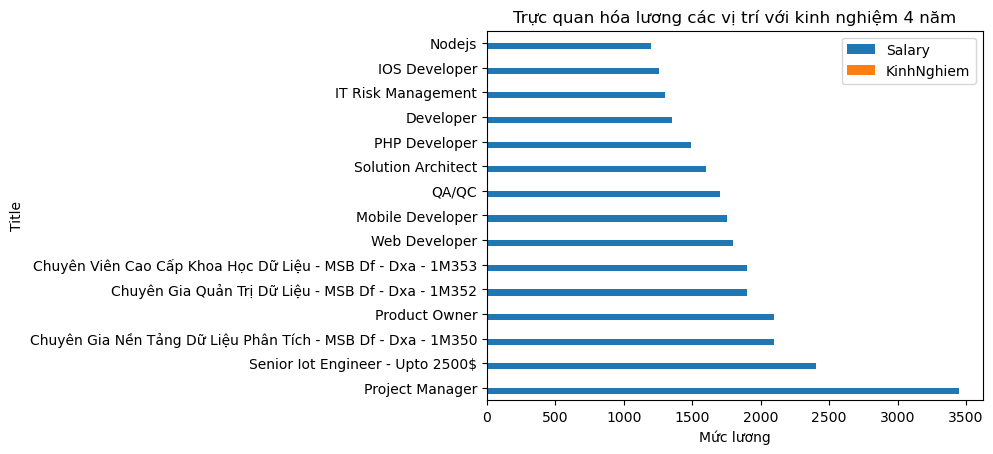

In [165]:
draw_plot(4)

**NHẬN XÉT:** 3 vị trí có mức lương cao nhất yêu cầu kinh nghiệm 4 năm là Project Manager, Senior IoT (Senior), Chuyên gia nền tảng dữ liệu phân tích.

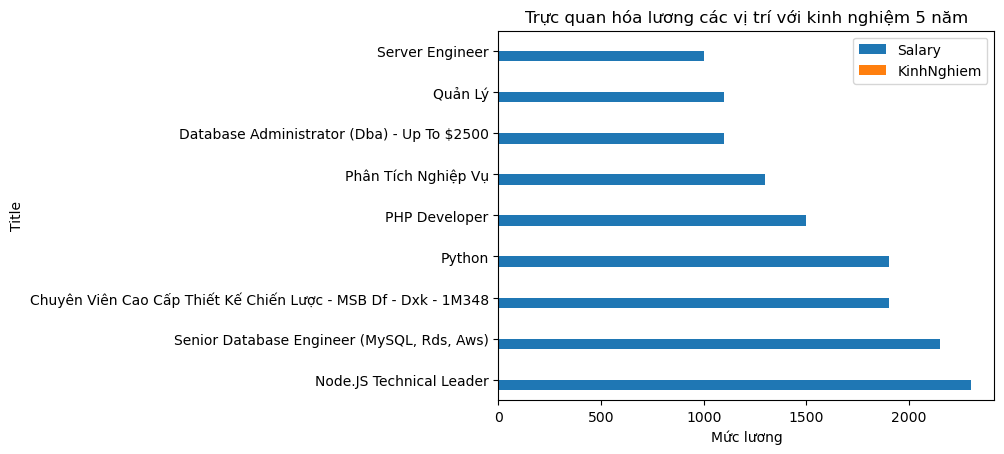

In [166]:
draw_plot(5)

**NHẬN XÉT:** 3 vị trí có mức lương cao nhất yêu cầu kinh nghiệm 5 năm là Node.js Technical Leader, Senior Database Engineer, Chuyên viên cao cấp thiết kế chiến lược.

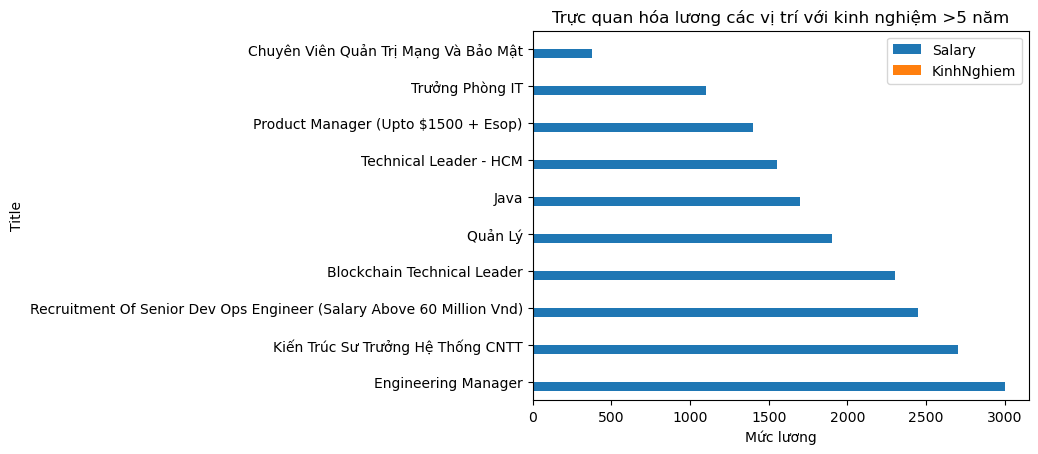

In [167]:
draw_plot(5.5)

**NHẬN XÉT:** Những ngành có lương cao yêu cầu kinh nghiệm từ 5 năm trở lên, chủ yếu ở vị trí leader, quản lý.

**KẾT LUẬN:** 
- Với mỗi năm kinh nghiệm sự phân bố mức lương với các ngành là khác nhau. Kinh nghiệm càng nhiều, thì mức lương cao chủ yếu tập trung vào các vị trí leader. 
- Đối với những vị trí không cần kinh nghiệm, thì các title có lương cao chủ yếu rơi vào các title đang cần nhân lực.